In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set plot font to serif
rcParams['font.family'] = 'serif'
plt.rc('font', size=12)
plt.rc('axes', labelsize=14)

# Set color variables to make colors easier later
darkblue = '#072448'
lightblue = '#54d2d2'
yellow = '#ffcb00'
orange = '#f8aa4b'
pink = '#ff6150'
gray = '#a89cac'

wrblue = '#0197F6'

In [3]:
# define some dictionaries to make it easy to loop over metallicities

cc = {'mw': pink,
      'lmc': orange,
      'smc': yellow,
      'izw': lightblue}

ldict = {'mw': 'Z = 0.014',
         'lmc': 'Z = 0.006',
         'smc': 'Z = 0.002',
         'izw': 'Z = 0.0002'}

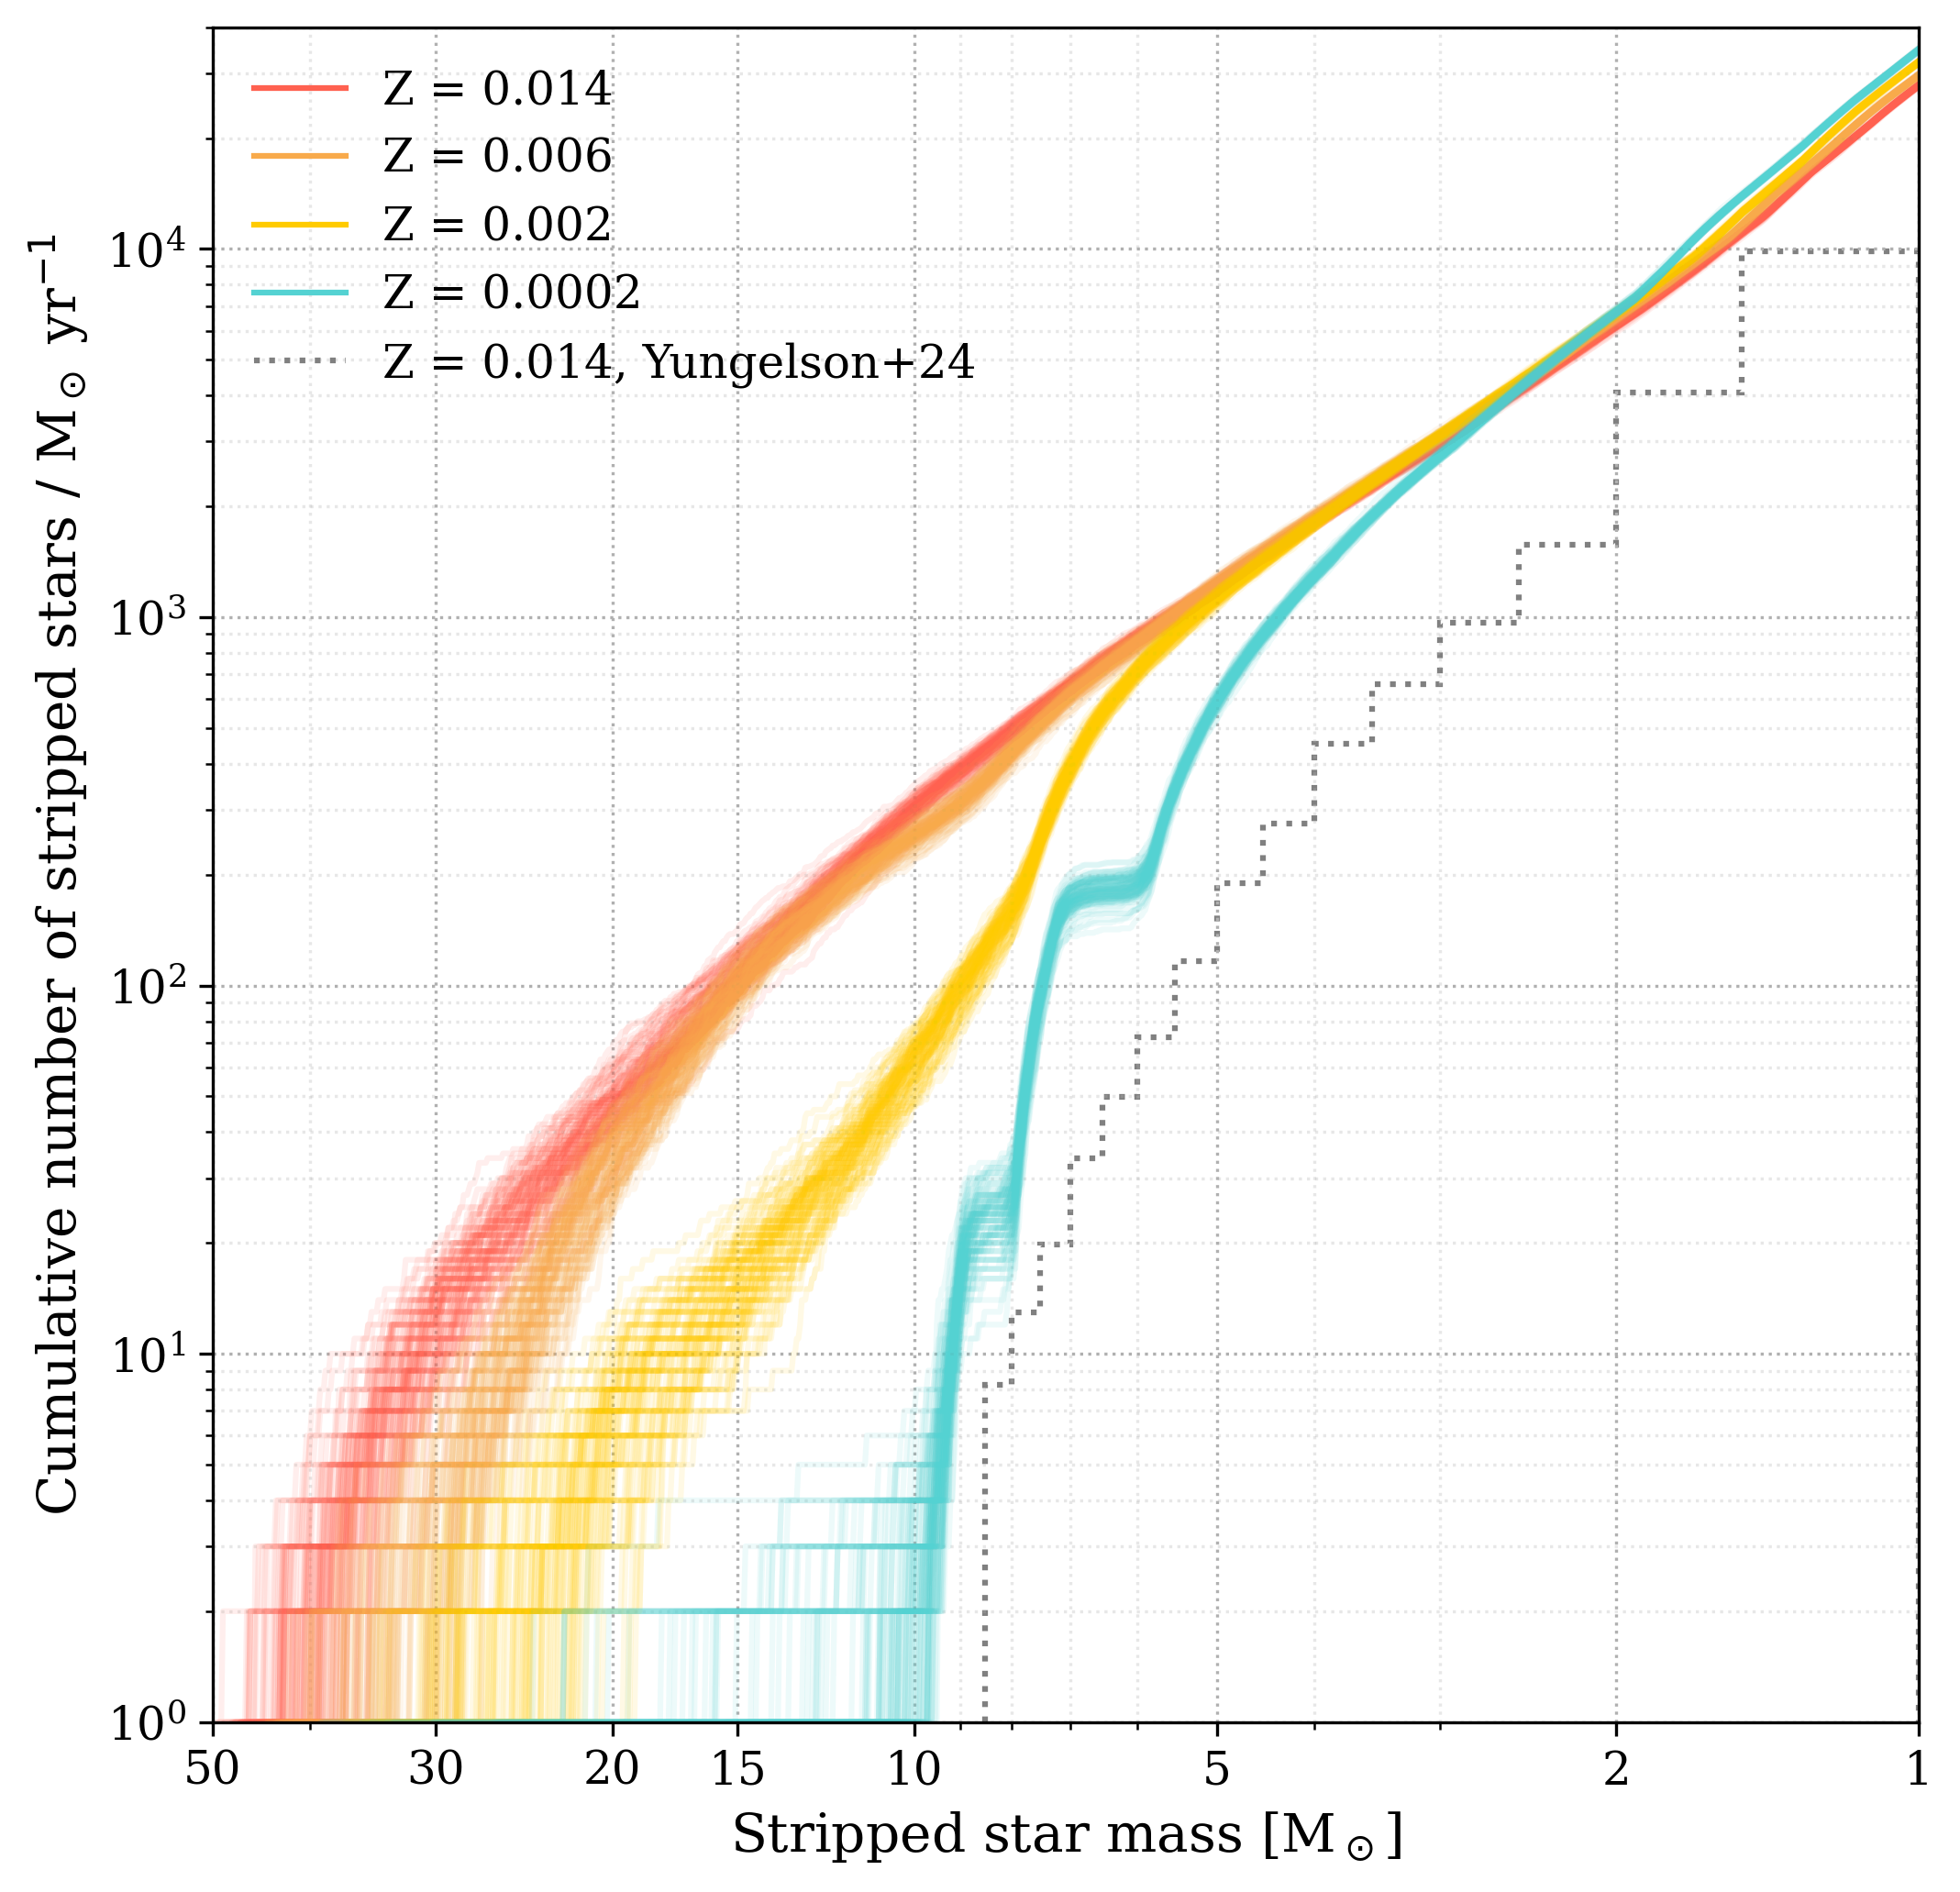

In [4]:
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(8, 8))

# bins
nbins = 21
bins = np.geomspace(1, 50, 1000)

# loop over all 4 metallicities
for l, env in enumerate(cc.keys()):
    # open population synthesis results
    datafile = f'../../data/moss/hist_grid_{env}.txt'
    hists = np.genfromtxt(datafile)
    # make a cdf that's calculated from 50 Msun to 1 Msun
    cdf100 = np.flip(np.cumsum(np.flip(hists, axis=1), axis=1), axis=1)
    # plot cdf for all 100 runs at each metallicity
    for i, run in enumerate(cdf100):
        if i==0:
            ax.plot(bins, run, color=cc[env], alpha=0.1, label=ldict[env])
        else:
            ax.plot(bins, run, color=cc[env], alpha=0.1)

# plot Yungelson+24 data
ydata = np.genfromtxt('../../data/yungelson_extracted.csv', skip_header=1, delimiter=',')
ax.stairs(ydata[:,2] / 2, [*ydata[:,0], 8.5], color='gray', lw=1.5, label='Z = 0.014, Yungelson+24', zorder=0, ls=':')

# axis formatting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1, 4e4)
ax.set_xlim(50, 1)
ax.set_xticks(np.flip([1, 2, 5, 10, 15, 20, 30, 50]))
ax.set_xticklabels(['50', '30', '20', '15', '10', '5', '2', '1'])
ax.set_xlabel(r'Stripped star mass [M$_\odot$]')
ax.set_ylabel(r'Cumulative number of stripped stars / M$_\odot$ yr$^{-1}$')
ax.grid(which='major', ls=':')
ax.grid(which='minor', ls=':', alpha=0.3)

leg = ax.legend(frameon=False)
for lh in leg.legend_handles: 
    lh.set_alpha(1)

plt.savefig('cumulative.png', bbox_inches='tight')